In [118]:
import pickle as pkl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
# Load dataset (data train) dari local device
data_train = pd.read_pickle('../Downloads/final-data-mining-competition-joints-2021/train.pkl/train.pkl')
data_train.head()

,ID,Jarak_Perjalanan,Tipe_Kendaraan,Pelanggan_Sejak_Bulan,Indeks_Gaya_Hidup,Tipe_Tujuan,Rating_Pelanggan,Pembatalan_Sebulan_Terakhir,Encode_1,Encode_2,Encode_3,Gender,Target
0,J005766927,55.06,C,NaN,NaN,A,NaN,0,35.0,49.0,NaN,Pria,2
1,J005904963,61.82,C,NaN,2.77769,NaN,2.20250,1,NaN,53.0,75.0,Pria,2
2,J005890232,58.24,B,10.0,3.17744,E,4.06625,NaN,95.0,NaN,62.0,Pria,2
3,J005727215,32.26,A,4.0,2.69283,A,4.06625,0,44.0,53.0,74.0,NaN,2
4,J005802876,27.46,C,0.0,NaN,H,1.35000,1,91.0,52.0,76.0,Wanita,3


In [120]:
# Load dataset (data test) dari local device
data_test = pd.read_pickle('../Downloads/final-data-mining-competition-joints-2021/test.pkl/test.pkl')
data_test.head()

,ID,Jarak_Perjalanan,Tipe_Kendaraan,Pelanggan_Sejak_Bulan,Indeks_Gaya_Hidup,Tipe_Tujuan,Rating_Pelanggan,Pembatalan_Sebulan_Terakhir,Encode_1,Encode_2,Encode_3,Gender
0,J005691205,20.58,B,1.0,2.66087,A,4.17500,NaN,NaN,48.0,63.0,Wanita
1,J005904963,61.82,C,1.0,2.77769,A,NaN,1,NaN,53.0,75.0,Pria
2,J005890232,58.24,B,10.0,NaN,E,4.06625,NaN,95.0,NaN,62.0,Pria
3,J005727215,32.26,NaN,4.0,2.69283,A,4.06625,NaN,44.0,53.0,74.0,Pria
4,J005787309,NaN,A,10.0,2.92629,A,3.79125,NaN,69.0,54.0,79.0,Pria


In [121]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98749 entries, 0 to 98748
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           98749 non-null  object 
 1   Jarak_Perjalanan             76838 non-null  float64
 2   Tipe_Kendaraan               76956 non-null  object 
 3   Pelanggan_Sejak_Bulan        79230 non-null  float64
 4   Indeks_Gaya_Hidup            71491 non-null  float64
 5   Tipe_Tujuan                  77057 non-null  object 
 6   Rating_Pelanggan             77330 non-null  float64
 7   Pembatalan_Sebulan_Terakhir  80477 non-null  object 
 8   Encode_1                     45373 non-null  float64
 9   Encode_2                     81279 non-null  float64
 10  Encode_3                     77632 non-null  float64
 11  Gender                       84921 non-null  object 
 12  Target                       98749 non-null  int64  
dtypes: float64(7), i

## 1. Pre-Processing Data Train

In [122]:
data_train.isnull().sum()

ID                                 0
Jarak_Perjalanan               21911
Tipe_Kendaraan                 21793
Pelanggan_Sejak_Bulan          19519
Indeks_Gaya_Hidup              27258
Tipe_Tujuan                    21692
Rating_Pelanggan               21419
Pembatalan_Sebulan_Terakhir    18272
Encode_1                       53376
Encode_2                       17470
Encode_3                       21117
Gender                         13828
Target                             0
dtype: int64

In [123]:
# Mengisi nilai data yang kosong dengan nilai data deskriptif dari masing-masing kolom yaitu mean
mean = data_train.mean()
data_train = data_train.replace(np.nan, mean)
data_train.head()

,ID,Jarak_Perjalanan,Tipe_Kendaraan,Pelanggan_Sejak_Bulan,Indeks_Gaya_Hidup,Tipe_Tujuan,Rating_Pelanggan,Pembatalan_Sebulan_Terakhir,Encode_1,Encode_2,Encode_3,Gender,Target
0,J005766927,55.06,C,6.015625,2.79800,A,2.862724,0,35.000000,49.000000,73.074067,Pria,2
1,J005904963,61.82,C,6.015625,2.77769,NaN,2.202500,1,64.129923,53.000000,75.000000,Pria,2
2,J005890232,58.24,B,10.000000,3.17744,E,4.066250,NaN,95.000000,51.138892,62.000000,Pria,2
3,J005727215,32.26,A,4.000000,2.69283,A,4.066250,0,44.000000,53.000000,74.000000,NaN,2
4,J005802876,27.46,C,0.000000,2.79800,H,1.350000,1,91.000000,52.000000,76.000000,Wanita,3


In [124]:
data_train.isnull().sum()

ID                                 0
Jarak_Perjalanan                   0
Tipe_Kendaraan                 21793
Pelanggan_Sejak_Bulan              0
Indeks_Gaya_Hidup                  0
Tipe_Tujuan                    21692
Rating_Pelanggan                   0
Pembatalan_Sebulan_Terakhir    18272
Encode_1                           0
Encode_2                           0
Encode_3                           0
Gender                         13828
Target                             0
dtype: int64

In [125]:
data_train['Gender'] = data_train['Gender'].fillna("Wanita")
data_train.head()

,ID,Jarak_Perjalanan,Tipe_Kendaraan,Pelanggan_Sejak_Bulan,Indeks_Gaya_Hidup,Tipe_Tujuan,Rating_Pelanggan,Pembatalan_Sebulan_Terakhir,Encode_1,Encode_2,Encode_3,Gender,Target
0,J005766927,55.06,C,6.015625,2.79800,A,2.862724,0,35.000000,49.000000,73.074067,Pria,2
1,J005904963,61.82,C,6.015625,2.77769,NaN,2.202500,1,64.129923,53.000000,75.000000,Pria,2
2,J005890232,58.24,B,10.000000,3.17744,E,4.066250,NaN,95.000000,51.138892,62.000000,Pria,2
3,J005727215,32.26,A,4.000000,2.69283,A,4.066250,0,44.000000,53.000000,74.000000,Wanita,2
4,J005802876,27.46,C,0.000000,2.79800,H,1.350000,1,91.000000,52.000000,76.000000,Wanita,3


In [126]:
# Mengubah kategori dari tipe data string menjadi tipe integer (numerik) untuk kolom yang memiliki tipe data string
from sklearn.preprocessing import OneHotEncoder
# Untuk Kolom Tipe_Kendaran
data_train["Tipe_Kendaraan"] = pd.factorize(data_train.Tipe_Kendaraan) [0]
data_train["Tipe_Kendaraan"] = pd.get_dummies(data_train["Tipe_Kendaraan"])


# Untuk kolom Tipe_Tujuan
data_train["Tipe_Tujuan"] = pd.factorize(data_train.Tipe_Tujuan) [0]
data_train["Tipe_Tujuan"] = pd.get_dummies(data_train["Tipe_Tujuan"])
# data_train['Tipe_Tujuan']= data_train['Tipe_Tujuan'].fillna('A')

# Untuk kolom Pembatalan_Sebulan_Terakhir
data_train["Pembatalan_Sebulan_Terakhir"] = pd.factorize(data_train.Pembatalan_Sebulan_Terakhir) [0]
data_train["Pembatalan_Sebulan_Terakhir"] = pd.get_dummies(data_train["Pembatalan_Sebulan_Terakhir"])

# Untuk kolom Gender
data_train["Gender"] = pd.factorize(data_train.Gender) [0]
data_train["Gender"] = pd.get_dummies(data_train["Gender"])

data_train["ID"] = [float(str(i).replace("J", "")) for i in data_train["ID"]]

data_train.head()

,ID,Jarak_Perjalanan,Tipe_Kendaraan,Pelanggan_Sejak_Bulan,Indeks_Gaya_Hidup,Tipe_Tujuan,Rating_Pelanggan,Pembatalan_Sebulan_Terakhir,Encode_1,Encode_2,Encode_3,Gender,Target
0,5766927.0,55.06,0,6.015625,2.79800,0,2.862724,0,35.000000,49.000000,73.074067,1,2
1,5904963.0,61.82,0,6.015625,2.77769,1,2.202500,0,64.129923,53.000000,75.000000,1,2
2,5890232.0,58.24,0,10.000000,3.17744,0,4.066250,1,95.000000,51.138892,62.000000,1,2
3,5727215.0,32.26,0,4.000000,2.69283,0,4.066250,0,44.000000,53.000000,74.000000,0,2
4,5802876.0,27.46,0,0.000000,2.79800,0,1.350000,0,91.000000,52.000000,76.000000,0,3


In [127]:
data_train.isnull().sum()

ID                             0
Jarak_Perjalanan               0
Tipe_Kendaraan                 0
Pelanggan_Sejak_Bulan          0
Indeks_Gaya_Hidup              0
Tipe_Tujuan                    0
Rating_Pelanggan               0
Pembatalan_Sebulan_Terakhir    0
Encode_1                       0
Encode_2                       0
Encode_3                       0
Gender                         0
Target                         0
dtype: int64

## 2. Visualisasi Untuk Data Train 

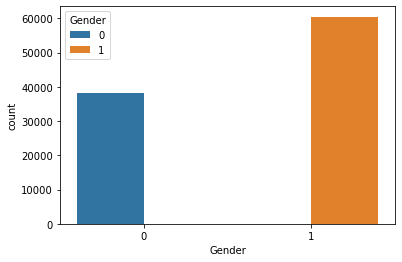

<Figure size 720x720 with 0 Axes>

In [128]:
# Membuat visualsasi untuk kolom Gender

sns.countplot(x="Gender", hue="Gender", data=data_train)
plt.figure(figsize=(10, 10))
plt.show()

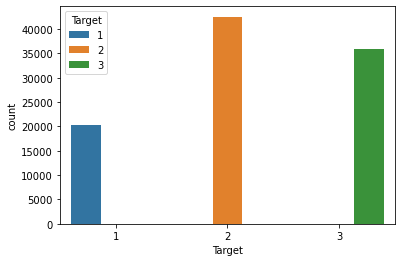

<Figure size 720x720 with 0 Axes>

In [129]:
# Membuat visualsasi untuk kolom Target

sns.countplot(x="Target", hue="Target", data=data_train)
plt.figure(figsize=(10, 10))
plt.show()

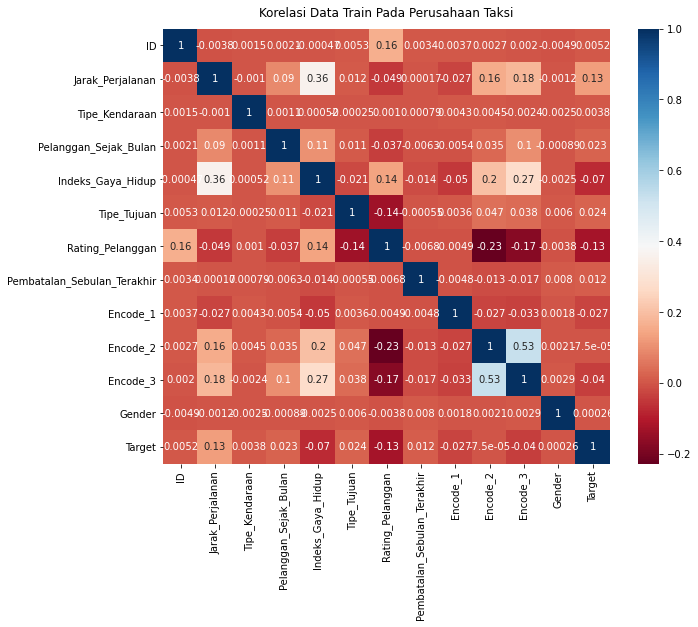

In [130]:
# Membuat sebuah korelasi untuk dataframe data_asuransi_train
plt.figure(figsize=(10, 8))

korelasi_data_train = sns.heatmap(data_train.corr(),cmap="RdBu", annot=True)
korelasi_data_train.set_title("Korelasi Data Train Pada Perusahaan Taksi", fontdict={"fontsize":12}, pad=12);

In [131]:
x = data_train.drop("Target", axis=1)
y = data_train["Target"]

data_train.sort_values(by=["ID"], inplace=True)

In [132]:
# Menentukan variable train dan variable test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=100)

In [133]:
# Menentukan algoritma
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, auc

model = RandomForestClassifier()

# Fitting variable 
model.fit(x_train, y_train)

RandomForestClassifier()

In [134]:
y_pred = model.predict(x_test)
acc_gaus = round(model.score(x_train, y_train)*100,2)

In [135]:
# Melakukan pengukuran performa 
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[ 589 1934  585]
 [ 508 4049 1732]
 [ 297 2850 2269]]


In [136]:
# Mencetak tingkat akurasi, nilai precision, recall, dan mean f1-score
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.42      0.19      0.26      3108
           2       0.46      0.64      0.54      6289
           3       0.49      0.42      0.45      5416

    accuracy                           0.47     14813
   macro avg       0.46      0.42      0.42     14813
weighted avg       0.46      0.47      0.45     14813



## 3. Preprocessing Data Test

In [137]:
# Mengubah kategori dari tipe data string menjadi tipe integer (numerik) untuk kolom yang memiliki tipe data string
from sklearn.preprocessing import OneHotEncoder 

# Untuk Kolom Tipe_Kendaran
data_test["Tipe_Kendaraan"] = pd.factorize(data_test.Tipe_Kendaraan) [0]
data_test["Tipe_Kendaraan"] = pd.get_dummies(data_test["Tipe_Kendaraan"])

# Untuk kolom Tipe_Tujuan
data_test["Tipe_Tujuan"] = pd.factorize(data_test.Tipe_Tujuan) [0]
data_test["Tipe_Tujuan"] = pd.get_dummies(data_test["Tipe_Tujuan"])

# Untuk kolom Pembatalan_Sebulan_Terakhir
data_test["Pembatalan_Sebulan_Terakhir"] = pd.factorize(data_test.Pembatalan_Sebulan_Terakhir) [0]
data_test["Pembatalan_Sebulan_Terakhir"] = pd.get_dummies(data_test["Pembatalan_Sebulan_Terakhir"])

# Untuk kolom Gender
data_test["Gender"] = pd.factorize(data_test.Gender) [0]
data_test["Gender"] = pd.get_dummies(data_test["Gender"])

data_test["ID"] = [float(str(i).replace("J", "")) for i in data_test["ID"]]

data_test.head()

,ID,Jarak_Perjalanan,Tipe_Kendaraan,Pelanggan_Sejak_Bulan,Indeks_Gaya_Hidup,Tipe_Tujuan,Rating_Pelanggan,Pembatalan_Sebulan_Terakhir,Encode_1,Encode_2,Encode_3,Gender
0,5691205.0,20.58,0,1.0,2.66087,0,4.17500,1,NaN,48.0,63.0,0
1,5904963.0,61.82,0,1.0,2.77769,0,NaN,0,NaN,53.0,75.0,0
2,5890232.0,58.24,0,10.0,NaN,0,4.06625,1,95.0,NaN,62.0,0
3,5727215.0,32.26,1,4.0,2.69283,0,4.06625,1,44.0,53.0,74.0,0
4,5787309.0,NaN,0,10.0,2.92629,0,3.79125,1,69.0,54.0,79.0,0


In [138]:
# Mengisi nilai data yang kosong dengan nilai data deskriptif dari masing-masing kolom yaitu mean
mean = data_test.mean()
data_test = data_test.replace(np.nan, mean)
data_test.head()

,ID,Jarak_Perjalanan,Tipe_Kendaraan,Pelanggan_Sejak_Bulan,Indeks_Gaya_Hidup,Tipe_Tujuan,Rating_Pelanggan,Pembatalan_Sebulan_Terakhir,Encode_1,Encode_2,Encode_3,Gender
0,5691205.0,20.580000,0,1.0,2.660870,0,4.175000,1,63.695804,48.000000,63.0,0
1,5904963.0,61.820000,0,1.0,2.777690,0,2.876973,0,63.695804,53.000000,75.0,0
2,5890232.0,58.240000,0,10.0,2.822837,0,4.066250,1,95.000000,51.153329,62.0,0
3,5727215.0,32.260000,1,4.0,2.692830,0,4.066250,1,44.000000,53.000000,74.0,0
4,5787309.0,49.345566,0,10.0,2.926290,0,3.791250,1,69.000000,54.000000,79.0,0


## 4. Visualisasi Untuk Data Test

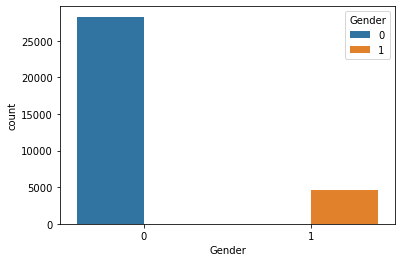

<Figure size 720x720 with 0 Axes>

In [139]:
# Membuat visualsasi untuk kolom Gender

sns.countplot(x="Gender", hue="Gender", data=data_test)
plt.figure(figsize=(10, 10))
plt.show()

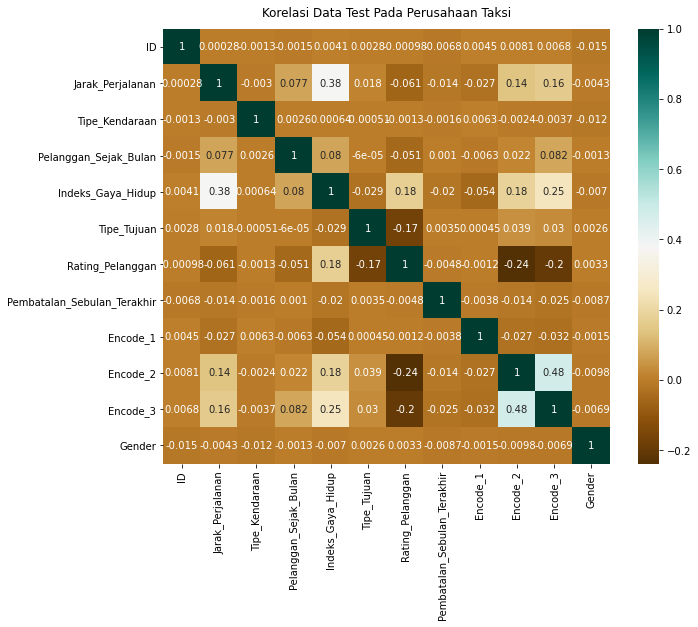

In [140]:
# Membuat sebuah korelasi untuk dataframe data_asuransi_test
plt.figure(figsize=(10, 8))

korelasi_data_test = sns.heatmap(data_test.corr(),cmap="BrBG", annot=True)
korelasi_data_test.set_title("Korelasi Data Test Pada Perusahaan Taksi", fontdict={"fontsize":12}, pad=12);

## 5. Submission

In [141]:
y_test_pred = model.predict(data_test)

In [142]:
output = pd.DataFrame({'ID' : data_test["ID"], 'Target' : y_test_pred})
output

,ID,Target
0,5691205.0,2
1,5904963.0,2
2,5890232.0,2
3,5727215.0,2
4,5787309.0,2
...,...,...
32911,5727147.0,2
32912,5731883.0,2
32913,5700625.0,2
32914,5728367.0,2


In [143]:
output["ID"] = [int(float(i)) for i in output["ID"]]
output

,ID,Target
0,5691205,2
1,5904963,2
2,5890232,2
3,5727215,2
4,5787309,2
...,...,...
32911,5727147,2
32912,5731883,2
32913,5700625,2
32914,5728367,2


In [144]:
output["ID"] = [str(int(i)) for i in output["ID"]]
output

,ID,Target
0,5691205,2
1,5904963,2
2,5890232,2
3,5727215,2
4,5787309,2
...,...,...
32911,5727147,2
32912,5731883,2
32913,5700625,2
32914,5728367,2


In [145]:
output['ID'] = 'J00'+output['ID']

In [146]:
output

,ID,Target
0,J005691205,2
1,J005904963,2
2,J005890232,2
3,J005727215,2
4,J005787309,2
...,...,...
32911,J005727147,2
32912,J005731883,2
32913,J005700625,2
32914,J005728367,2


In [147]:
output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32916 entries, 0 to 32915
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      32916 non-null  object
 1   Target  32916 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 514.4+ KB


In [148]:
output.to_csv("submission.csv", index=False)

In [149]:
df = pd.read_csv('submission.csv')

## 5. Membuat Visualisasi Untuk Variabel Output 

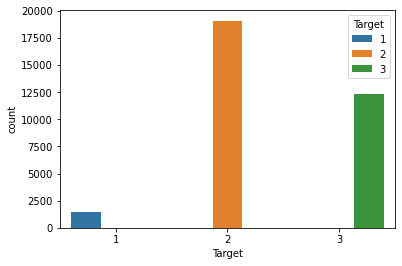

<Figure size 720x720 with 0 Axes>

In [150]:
# Visualisasi kolom Target dari variable output

sns.countplot(x="Target", hue="Target", data=output)
plt.figure(figsize=(10, 10))
plt.show()